<br><br>
<font size='6'><b>Independent Component Analysis (ICA), Optional</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        by Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

# 1. The Cocktail Party Problem

You're at a crowded party. The music is loud, people are laughing, and a dozen different conversations are happening all around you. However, despite the hubbub, you're able to focus on the one voice you want to hear.

<img src="./image_files/Cocktail party antique photograph.png" width = 400>
(No reason to shout. Though background noise can be distracting, the brain has the remarkable ability to track conversation and scale down unwanted noise.
Courtesy of the National Archives)

<img src="./image_files/CocktailParty.jpg" width = 500>

Consider two conversations in a room that are happening simultaneously. How is it that the two different acoustic signals of converstaion one and two can be separated out?

$$
\begin{align*}
x_1 &= a_{11}s_1 + a_{12}s_2\\
x_2 &= a_{21}s_1 + a_{22}s_2
\end{align*}
$$


In [4]:
[S1,Fs1] = audioread('The_Phantom_Of_The_Opera.wav');
[S2,Fs2] = audioread('Barack_Obama.wav');

m = 300000;
S1 = mean(S1(1:m,:),2); % stereo -> mono
S2 = mean(S2(1:m,:),2); % stereo -> mono

SS = [S1 S2]';
A = [1/2, 2/3];     
mixed = A*SS;

sound(mixed,Fs1)

# 2. ICA

Observed random vector $x$ is modelled by a linear variable model
$$ x_i = \sum_{j=1}^{m} a_{ij}s_j, \qquad i = 1,\cdots, n$$

or in matrix form

$$ x= As $$

where

- the 'mixing' matrix $A$ is constant
- the $s_i$ are latent random variables called the independent components
- Estimate both $A$ and $s_i$, observing only $x$

- must assume:
    - $s_i$ are mutually independent
    - $s_i$ are non-gaussian


- At first, we might simply say that the solution of this is trivial and it is given by<br><br>
$$ s = A^{-1}x$$
 However, we do not know $A$ and the signal $s$.


- PCA and ICA (pictorial explanation)

<table style="border-style: hidden; border-collapse: collapse;" width = "90%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 45% style="border-style: hidden; border-collapse: collapse;">
             <img src="./image_files/pca.png" width=250>
        </td>
        <td width = 45%>
            <img src="./image_files/ica.png" width=250>
        </td>
    </tr>
</table>

- We will not learn about how ICA works (optinal). For your reference:
    - http://sccn.ucsd.edu/~arno/indexica.html    
    - [Lecture video by Andrew Ng at Stanford](https://www.youtube.com/watch?v=QGd06MTRMHs)
    - [Lecture video of Computational method for data analysis at UW](https://youtu.be/NKsW5ywYxWs)

<table style="border-style: hidden; border-collapse: collapse;" width = "90%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 30% style="border-style: hidden; border-collapse: collapse;">
             $$\text{original}\to$$
        </td>
        <td width = 30% style="border-style: hidden; border-collapse: collapse;">
             $$\text{mixed}\to$$
        </td>
        <td width = 30% style="border-style: hidden; border-collapse: collapse;">
             $$\text{whitened}$$
        </td>
    </tr>
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 30% style="border-style: hidden; border-collapse: collapse;">
             <img src="./image_files/abwhit.jpg" width=250>
        </td>
        <td width = 30% style="border-style: hidden; border-collapse: collapse;">
             <img src="./image_files/m1m2whit.jpg" width=250>
        </td>
        <td width = 30% style="border-style: hidden; border-collapse: collapse;">
             <img src="./image_files/whiten.jpg" width=250>
        </td>
    </tr>
</table>    
    
<table style="border-style: hidden; border-collapse: collapse;" width = "90%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 45% style="border-style: hidden; border-collapse: collapse;">
             $$\text{whitened}\to$$
        </td>
        <td width = 45% style="border-style: hidden; border-collapse: collapse;">
             $$\quad \text{rotated (demixed)}$$
        </td>
    </tr>
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 45% style="border-style: hidden; border-collapse: collapse;">
             <img src="./image_files/gauss1.jpg" width=250>
        </td>
        <td width = 45% style="border-style: hidden; border-collapse: collapse;">
             <img src="./image_files/gauss2.jpg" width=250>
        </td>
    </tr>
</table>

    
- Instead, I will demonstrate some of the famous ICA examples using the FastICA toolbox ([download](http://research.ics.aalto.fi/ica/fastica/)) in Matlab.
    - http://research.ics.aalto.fi/ica/fastica/
    - https://en.wikipedia.org/wiki/FastICA
    - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html
    

# 3. Signal Example

In [2]:
[sig, mixedsig] = demosig;
[icasig] = fastica(mixedsig);

Number of signals: 4
Number of samples: 500
Calculating covariance...
Dimension not reduced.
Selected [ 4 ] dimensions.
Smallest remaining (non-zero) eigenvalue [ 0.0253466 ]
Largest remaining (non-zero) eigenvalue [ 5.96405 ]
Sum of removed eigenvalues [ 0 ]
[ 100 ] % of (non-zero) eigenvalues retained.
Whitening...
Check: covariance differs from identity by [ 1.25455e-14 ].
Used approach [ defl ].
Used nonlinearity [ pow3 ].
Starting ICA calculation...
IC 1 .........computed ( 9 steps ) 
IC 2 ......computed ( 6 steps ) 
IC 3 ......computed ( 6 steps ) 
IC 4 ..computed ( 2 steps ) 
Done.
Adding the mean back to the data.

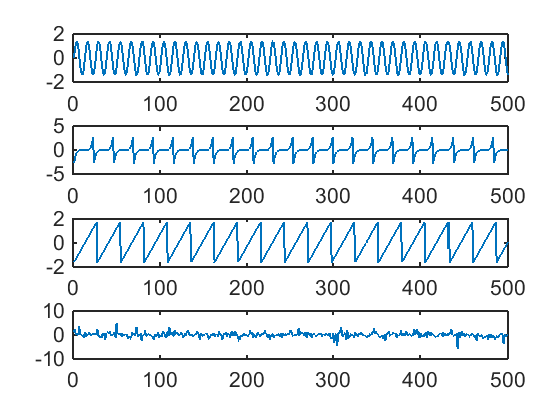

In [3]:
subplot(4,1,1), plot(sig(1,:)')
subplot(4,1,2), plot(sig(2,:)')
subplot(4,1,3), plot(sig(3,:)')
subplot(4,1,4), plot(sig(4,:)')

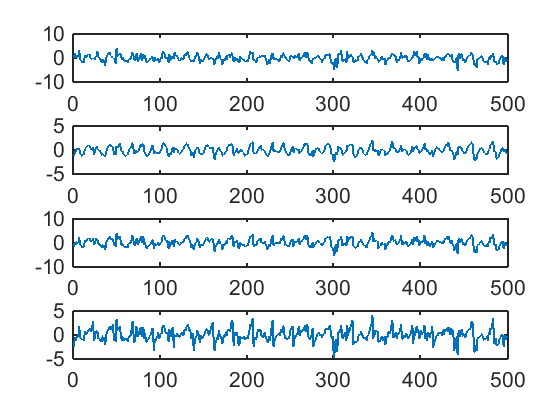

In [4]:
subplot(4,1,1), plot(mixedsig(1,:)')
subplot(4,1,2), plot(mixedsig(2,:)')
subplot(4,1,3), plot(mixedsig(3,:)')
subplot(4,1,4), plot(mixedsig(4,:)')

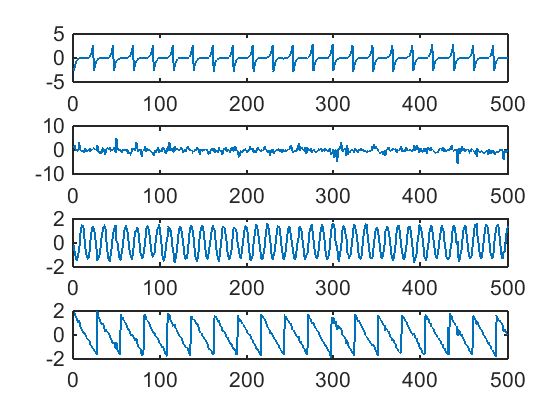

In [5]:
subplot(4,1,1), plot(icasig(1,:)')
subplot(4,1,2), plot(icasig(2,:)')
subplot(4,1,3), plot(icasig(3,:)')
subplot(4,1,4), plot(icasig(4,:)')

# 4. Sound Example

Download
- The_Phantom_Of_The_Opera.wav
- Barack_Obama.wav

In [1]:
[S1,Fs1] = audioread('The_Phantom_Of_The_Opera.wav');
[S2,Fs2] = audioread('Barack_Obama.wav');

m = 300000;
S1 = mean(S1(1:m,:),2);
S2 = mean(S2(1:m,:),2);

In [2]:
SS = [S1 S2]';
A = [1/2, 2/3;
     4/5, 1/4];

mixed = A*SS;

In [3]:
sound(mixed(1,:),Fs1)

In [4]:
sound(mixed(2,:),Fs1)

In [5]:
icasig = fastica(mixed);

Number of signals: 2
Number of samples: 300000
Calculating covariance...
Dimension not reduced.
Selected [ 2 ] dimensions.
Smallest remaining (non-zero) eigenvalue [ 0.000294554 ]
Largest remaining (non-zero) eigenvalue [ 0.00426385 ]
Sum of removed eigenvalues [ 0 ]
[ 100 ] % of (non-zero) eigenvalues retained.
Whitening...
Check: covariance differs from identity by [ 7.10543e-15 ].
Used approach [ defl ].
Used nonlinearity [ pow3 ].
Starting ICA calculation...
IC 1 .......computed ( 7 steps ) 
IC 2 ..computed ( 2 steps ) 
Done.
Adding the mean back to the data.

In [6]:
sound(icasig(1,:),Fs1)

In [7]:
sound(icasig(2,:),Fs1)

# 5. Image Example

Download
- Shine2.jpg
- nature2.jpg

In [8]:
S1 = imread([pwd,'\data_files\Shine2.jpg']);
S2 = imread([pwd,'\data_files\nature2.jpg']);

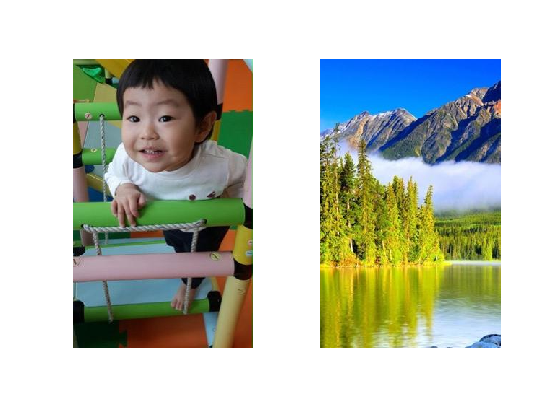

In [9]:
subplot(1,2,1), imshow(S1)
subplot(1,2,2), imshow(S2)

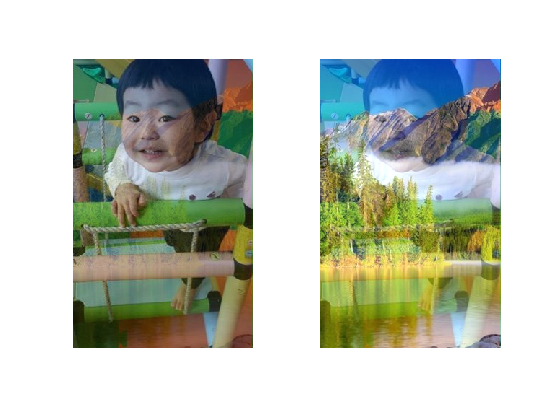

In [10]:
A = [3/4 1/5;
    1/2 2/3];

X1 = double(A(1,1)*S1 + A(1,2)*S2);
X2 = double(A(2,1)*S1 + A(2,2)*S2);

subplot(1,2,1), imshow(uint8(X1));
subplot(1,2,2), imshow(uint8(X2));

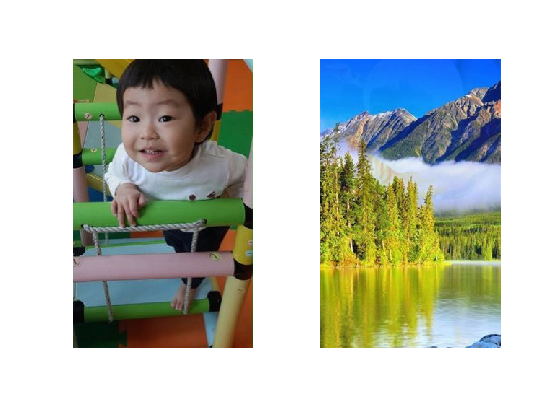

Number of signals: 2
Number of samples: 300000
Calculating covariance...
Dimension not reduced.
Selected [ 2 ] dimensions.
Smallest remaining (non-zero) eigenvalue [ 611.479 ]
Largest remaining (non-zero) eigenvalue [ 5531.64 ]
Sum of removed eigenvalues [ 0 ]
[ 100 ] % of (non-zero) eigenvalues retained.
Whitening...
Check: covariance differs from identity by [ 7.4718e-14 ].
Used approach [ defl ].
Used nonlinearity [ pow3 ].
Starting ICA calculation...
IC 1 .......computed ( 7 steps ) 
IC 2 ..computed ( 2 steps ) 
Done.
Adding the mean back to the data.

In [29]:
[m,n,k] = size(X1);
x1 = reshape(X1,m*n*k,1);
x2 = reshape(X2,m*n*k,1);
mixedimages = [x1 x2]';
icaimages = fastica(mixedimages);
icaimages = icaimages';

S1bar = reshape(icaimages(:,1),m,n,k);
S2bar = reshape(icaimages(:,2),m,n,k);

min1 = min(min(min(S1bar)));
S1bar = S1bar - min1;
max1 = max(max(max(S1bar)));
S1bar = S1bar*(255/max1);

min2 = min(min(min(S2bar)));
S2bar = S2bar - min2;
max2 = max(max(max(S2bar)));
S2bar = S2bar*(255/max2);

subplot(1,2,1), imshow(uint8(S1bar)), axis off
subplot(1,2,2), imshow(uint8(S2bar)), axis off

In [5]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>